# Plotting

## Number of Estimators vs. Kaggle Accuracy

First I'll do the Kaggle accuracy vs Bootstrap count plot.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [256]:
# Data from Kaggle
B = [1, 2, 3, 4, 5,7, 9, 30, 45, 60, 69, 97, 99]
kaggle_errors = [0.00524, 0.00430, 0.00406, 0.00418, 0.00416, 0.00397, 0.00390, 0.00381, 0.00380, 0.00377, 0.00378, 0.00378, 0.00378]

In [346]:
FONT = 'Arial'
FONT_WEIGHT='bold'
FONT_SIZE = 30

COLOR = '#2e5ca5'

LINE_WIDTH = 3
DOT_SIZE = 10

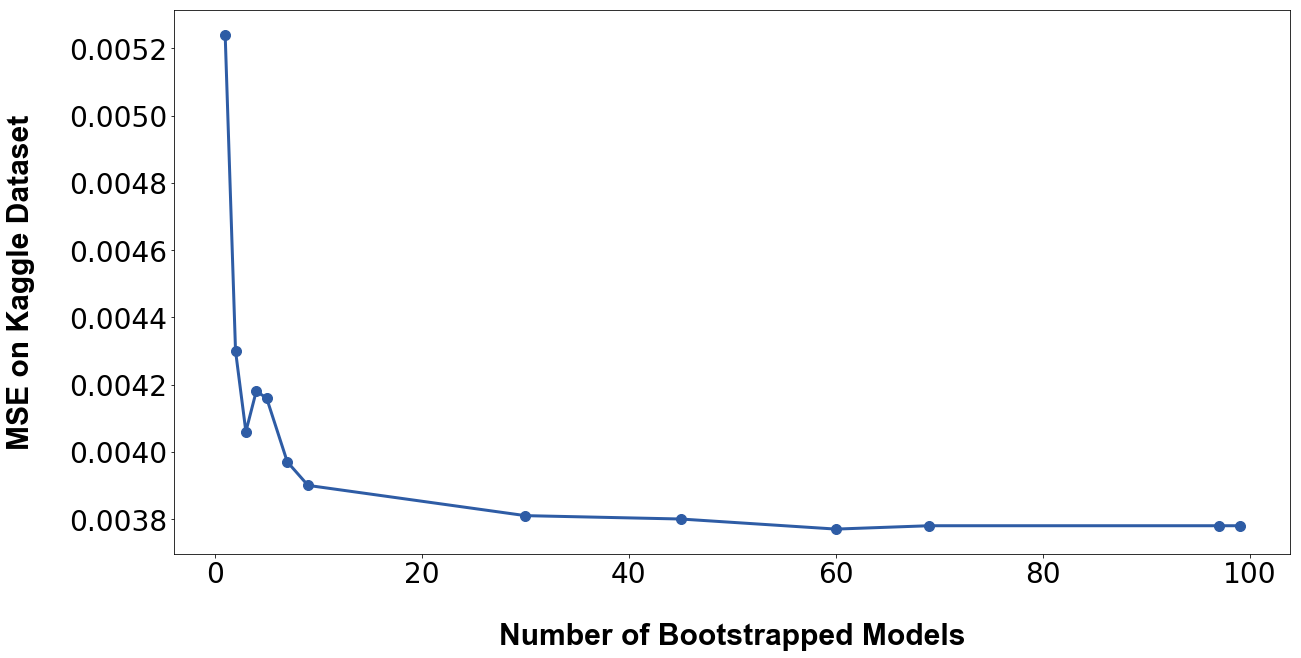

In [347]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

font_params = {'fontname':FONT, 'fontweight':FONT_WEIGHT, 'fontsize':FONT_SIZE, 'labelpad': FONT_SIZE + 4}

ax.set_xlabel('Number of Bootstrapped Models', **font_params)
ax.set_ylabel('MSE on Kaggle Dataset', **font_params)

plt.plot(B, kaggle_errors, ls='-', color=COLOR, markersize=DOT_SIZE, marker='o', linewidth=LINE_WIDTH)

# Tick Size is 2 smaller than font size
for tick in ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FONT_SIZE-2)
    
plt.savefig('test_boot_plot.eps', format='eps', dpi=1000)    
plt.show()


## Number of Estimators vs. Validation Error (with CI)

In [206]:
def draw_bootstrap_curve(data, save_path, variable='mse', conf=95):
    # Use all but the last entry in the dict
    B = list(range(1, len(data) + 1))
    alpha = (100-conf)/2
    
    mean_error, err_below, err_above = [], [], []
    
    for b in B:
        errors = data[b][variable]
        error_estimate = np.mean(errors)
        CI_lower = np.percentile(errors, alpha)
        CI_upper = np.percentile(errors, 100 - alpha)

        mean_error.append( error_estimate )

        err_below.append( error_estimate - CI_lower )
        err_above.append( CI_upper - error_estimate )
        
    if variable == 'mse':
        variable_clean = 'MSE'
    else: 
        variable_clean = 'Angular Error'
    
    plot_boot_error(B, mean_error, err_below, err_above, variable_clean, save_path)


In [356]:
def plot_boot_error(index, center, err_below, err_above, variable, save_path):
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)


    ax.set_xlabel('Number of Bootstrapped Models', **font_params)
    ax.set_ylabel('{} on Validation Dataset'.format(variable), **font_params)

    plt.errorbar(index, center, yerr=[err_below, err_above], ls='-', marker='o',
                color=COLOR, markersize=DOT_SIZE, capsize=DOT_SIZE, linewidth=LINE_WIDTH,
                ecolor='#9298a0')

    # Tick Size is 2 smaller than font size
    for tick in ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(FONT_SIZE-2)
        
    plt.xticks(index) 

    plt.savefig(save_path, format='eps', dpi=1000)    
    plt.show()


In [203]:
import pickle

In [326]:
with open( 'validation_data.pickle', 'rb') as in_file:
        d = pickle.load(in_file)

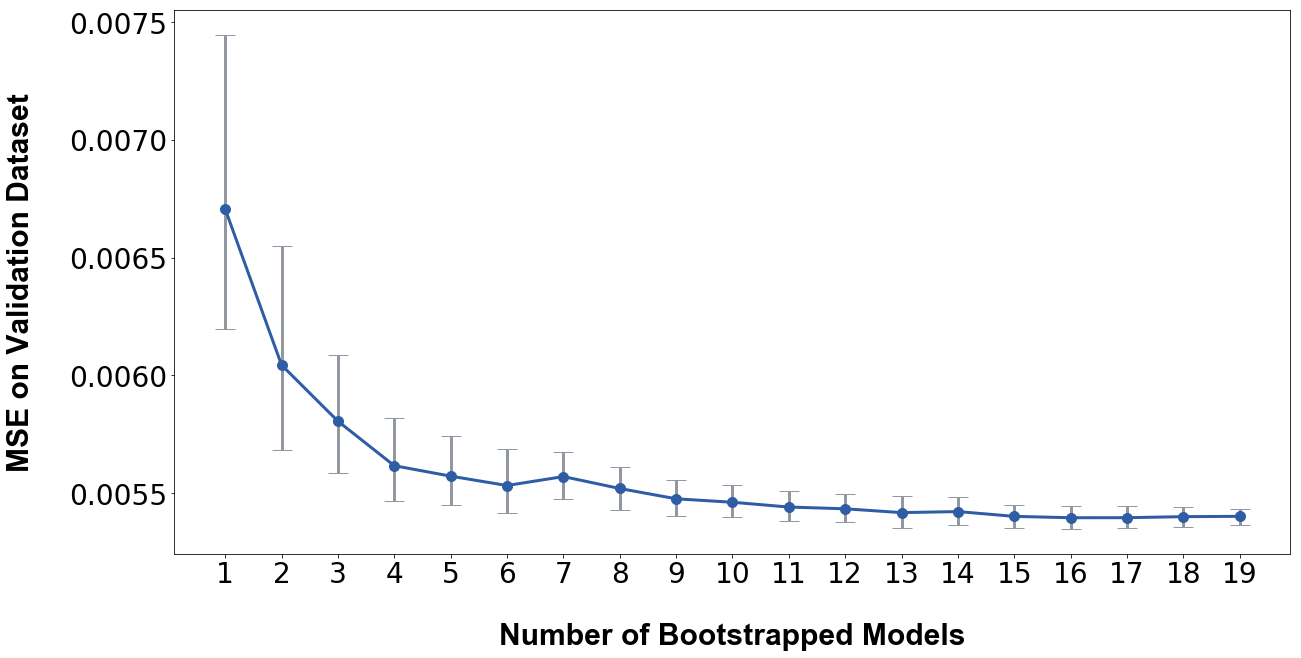

In [357]:
draw_bootstrap_curve(d, 'bootstrap_MSE_19.eps', 'mse', 95)

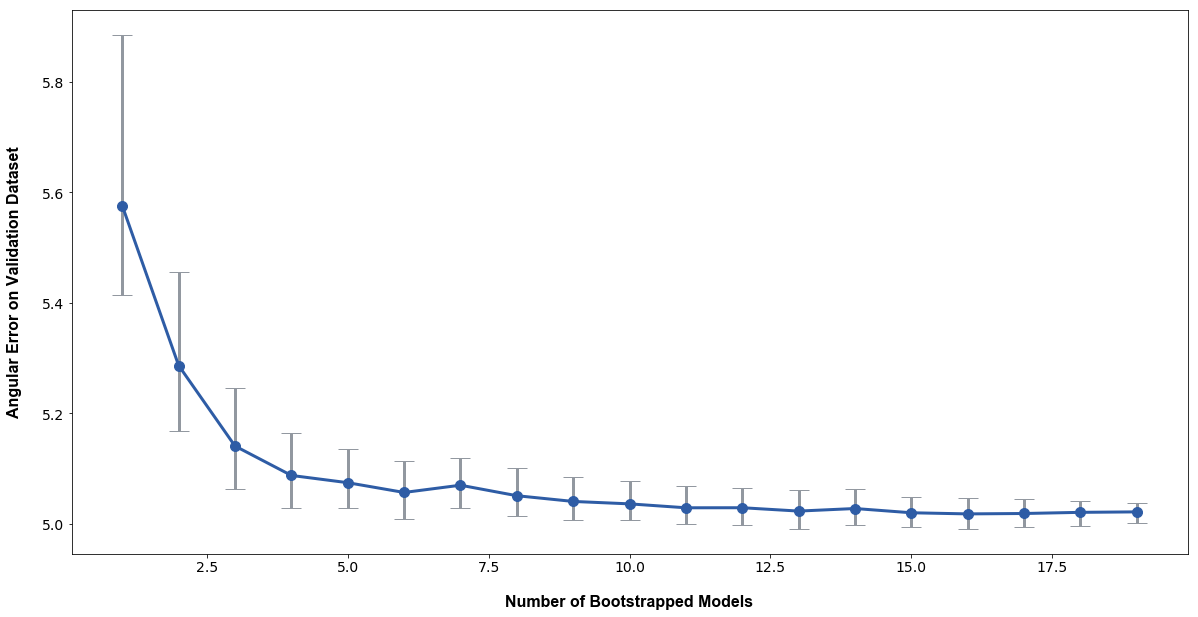

In [337]:
draw_bootstrap_curve(d, 'bootstrap_angular_19.eps', 'angular', 95)

## True Angle vs. Error (Validation Set), (aka the Soup Plate)

In [320]:
import pandas as pd
soup_bowl_dat = pd.read_csv('soup_plate_21.csv')

In [321]:
soup_bowl_dat

,Unnamed: 0,angular,pitch,pitch_pred,yaw,yaw_pred
0,0,2.543125,-0.284043,-0.294853,-0.071925,-0.116843
1,1,2.719242,-0.242470,-0.210982,0.209679,0.173236
2,2,1.103130,-0.190234,-0.170988,-0.055988,-0.056502
3,3,3.108740,-0.279683,-0.297291,-0.219014,-0.272549
4,4,3.808799,-0.031439,-0.082275,0.008008,0.050916
5,5,1.036989,-0.249341,-0.245722,-0.254683,-0.236392
6,6,2.086827,-0.039451,-0.004780,0.127990,0.116831
7,7,2.948983,-0.077687,-0.115355,-0.231675,-0.196434
8,8,0.807072,-0.117213,-0.109293,0.092119,0.103843
9,9,3.838559,-0.236029,-0.175869,0.182432,0.152310


In [322]:
x,y = soup_bowl_dat['yaw']*180/np.pi, soup_bowl_dat['angular']

In [323]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess

In [324]:
from basic_units import radians, degrees, cos

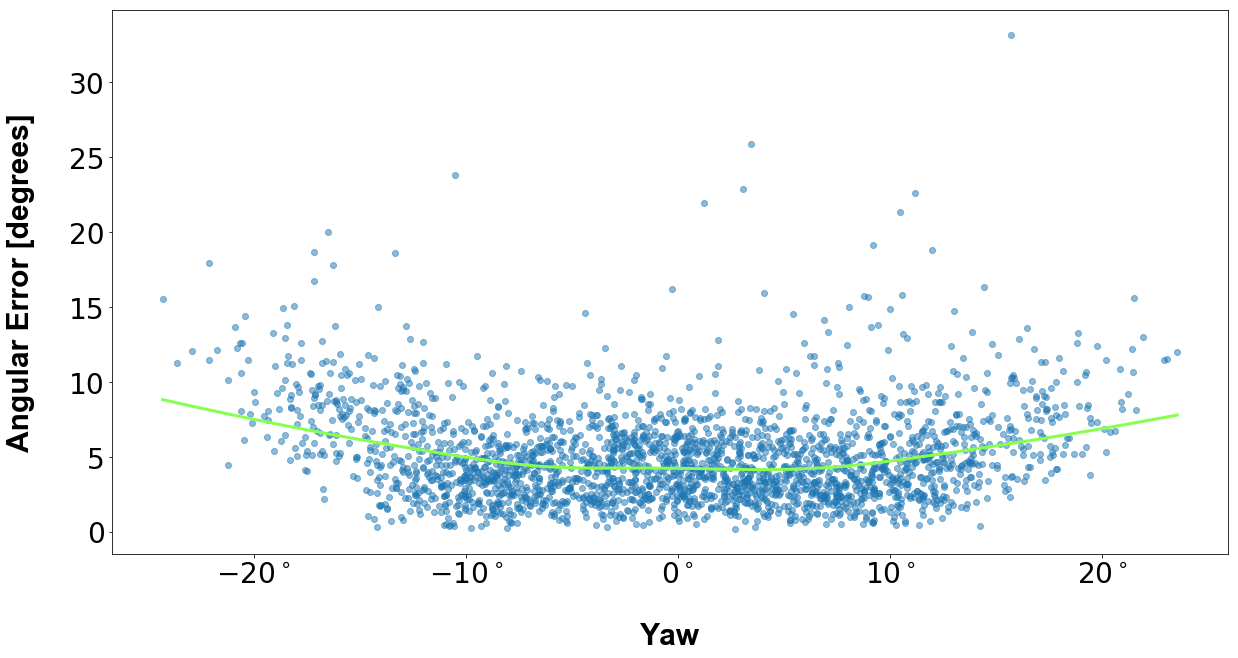

In [349]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

z = lowess(y, x)
rad_x = [val*degrees for val in x]
plt.scatter(rad_x, y, alpha = 0.5)

rad_z = [val*degrees for val in z[:, 0]]
plt.plot(rad_z, z[:,1], lw = 3, color = '#86ff51')
for tick in ax.xaxis.get_major_ticks() + ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FONT_SIZE-2)

ax.set_xlabel('Yaw', **font_params)
ax.set_ylabel('Angular Error [degrees]', **font_params)

#plt.savefig('yaw.eps', format='eps', dpi=1000) 
plt.savefig("yaw.pdf", bbox_inches='tight', dpi=1000)

plt.show()
